<a href="https://colab.research.google.com/github/yh08037/gnbai20201/blob/master/lab1/Baekbosung/gnbai_lab1_Baekbosung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GnB AI Project Assignment
## Lab 1 : Linear Regression
### Tasks
1. data_lab1.txt의 데이터를 읽고, 출력값을 입력값에 대해 plot하여라.
2. 배치 경사 하강법을 사용해서 선형 회귀 모델을 학습시켜라. 파라미터의 최적값은 무엇인가?
3. 확률적 경사 하강법을 사용해서 선형 회귀 모델을 학습시켜라. 파라미터의 최적값은 무엇인가?
4. 최소 제곱법을 사용해서 선형 회귀 모델을 학습시켜라. 파라미터의 최적값은 무엇인가?
5. 원본 데이터 위에 2, 3, 4에서 얻은 회귀자를 plot하여라.
6. train.txt에 대하여 같은 작업을 반복하고, test.txt로 모델을 평가하여라.

### Imports

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

### Numpy basics

In [0]:
a = np.array([[2, 0], [0, 2]])
b = np.array([[4, 1], [2, 2]])
print(a)
print(b)

[[2 0]
 [0 2]]
[[4 1]
 [2 2]]


In [0]:
c = np.matmul(a, b)     # 행렬곱
d = np.transpose(c)     # 전치행렬
e = np.linalg.inv(d)    # 역행렬
print(c)
print(d)
print(e)

[[8 2]
 [4 4]]
[[8 4]
 [2 4]]
[[ 0.16666667 -0.16666667]
 [-0.08333333  0.33333333]]


### 1. Read and plot data


In [79]:
# pandas를 통해 txt 파일 읽어오기
name_file = '/content/drive/My Drive/Colab Notebooks/test.txt'
columns = ['x', 'y']

data_in = pd.read_csv(name_file, names=columns, sep='	')

# pandas dataframe으로부터 numpy 행렬로 바꾸기
x = np.asarray(data_in['x'])
y = np.asarray(data_in['y'])

print("shape of x :", x.shape)
print("shape of y :", y.shape)

shape of x : (60,)
shape of y : (60,)


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


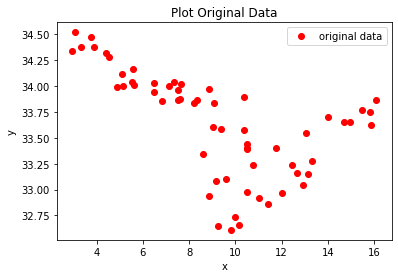

In [80]:
# plt를 통해 데이터 plot 하기
plt.plot(x, y, 'ro', label='original data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot Original Data')
plt.legend()
plt.show()

In [81]:
# x에 x0=1에 해당하는 열을 추가하여 x를 reshape하기
# 정상적으로 코딩했다면 x의 shape는 (100,)에서 (100, 2)가 되어야함
x = np.column_stack((np.ones_like(x), x))
print('shape of x', x.shape)

# 현재 1차원 배열 y를 열벡터로 reshape하기
# 정상적으로 코딩했다면 x의 shape는 (100,)에서 (100, 1)이 되어야함
y = y.reshape(-1, 1)
print('shape of y', y.shape)

shape of x (60, 2)
shape of y (60, 1)


In [82]:
# x의 첫 10개의 데이터 출력해보기
print(x[:10])

# y의 첫 10개의 데이터 출력해보기
print(y[:10])

[[ 1.    8.87]
 [ 1.    8.35]
 [ 1.    5.14]
 [ 1.   10.14]
 [ 1.   16.09]
 [ 1.    3.06]
 [ 1.   10.36]
 [ 1.   14.  ]
 [ 1.   15.48]
 [ 1.    5.58]]
[[33.969]
 [33.87 ]
 [34.   ]
 [32.657]
 [33.864]
 [34.52 ]
 [33.579]
 [33.698]
 [33.77 ]
 [34.167]]


#### 참고 : 주요 행렬들의 shape

행렬 x의 shape는 [I, N+1]입니다!

행렬 y의 shape는 [I, 1]입니다!

행렬 theta의 shape는 [N+1, 1]입니다!


In [0]:
# I : 입력 데이터의 개수
# N : 입력 데이터의 차원
I = x.shape[0]
N = x.shape[1] - 1

In [0]:
# 학습률, 에포크 수 설정 
# 두개의 값을 바꿔보면서 아래의 결과가 어떻게 다르게 나오는지 관찰해보세요!
alpha = 0.001
max_epoch = 10000 

### 2. Batch Gradient Descent

In [85]:
# 타이머 시작
start = time.time()

# 파라미터 랜덤 초기화
theta_BGD = np.random.rand(N+1, 1)

# 메인 루프
for epoch in range(max_epoch):
    # n 루프를 도는 중에 변경된 theta값을 사용하면 안되므로, 미리 값을 저장하여 사용합니다.
    theta_BGD_tp = np.transpose(theta_BGD)
    for n in range(0, N+1):
        gradient = 0.
        for i in range(0, I):
            gradient += (np.matmul(theta_BGD_tp, x[i]) - y[i]) * x[i][n]
        theta_BGD[n] = theta_BGD[n] - alpha * gradient

# 학습에 소요된 시간 출력
print('time :', time.time() - start)

# 학습된 파라미터 출력
print(theta_BGD)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in add
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in matmul
  del sys.path[0]


time : 6.229804039001465
[[nan]
 [nan]]


### 3. Stochastic Gradient Descent

In [86]:
# 타이머 시작
start = time.time()
# 파라미터 랜덤 초기화
theta_SGD = np.random.rand(N+1, 1)
# 메인 루프
for epoch in range(max_epoch):
  theta_SGD_tp = np.transpose(theta_SGD)
  for n in range(0, N+1):
    i = np.random.randint(1,I)
    theta_SGD[n] = theta_SGD[n] - alpha*(np.matmul(theta_SGD_tp,x[i]) - y[i])*x[i][n]

# 학습에 소요된 시간 출력
print('time :', time.time() - start)
# 학습된 파라미터 출력
print(theta_SGD)

time : 0.36745190620422363
[[24.21490918]
 [ 0.90609967]]


### 4. Ordinary Least Squares

In [87]:
# 타이머 시작
start = time.time()
# 공식으로 파라미터 계산
a=np.linalg.inv(np.matmul(np.transpose(x), x))
b=np.matmul(np.transpose(x), y)
theta_OLS = np.matmul(a, b)
# 계산에 소요된 시간 출력
print('time: ', time.time()-start)
# 파라미터 출력
print(theta_OLS)

time:  0.0003345012664794922
[[34.39578149]
 [-0.08260418]]


### 5. Plot linear regressors over original dataset

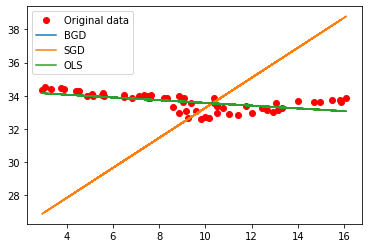

In [88]:
# plt를 통해 원본 데이터와 3개의 회귀자 plot 하기
plt.plot(x[:, 1], y, 'ro', label='Original data')
q1 = theta_BGD[0, 0] + theta_BGD[1, 0] * x[:, 1]
q2 = theta_SGD[0, 0] + theta_SGD[1, 0] * x[:, 1]
q3 = theta_OLS[0, 0] + theta_OLS[1, 0] * x[:, 1]
plt.plot(x[:, 1], q1, label='BGD')
plt.plot(x[:, 1], q2, label='SGD')
plt.plot(x[:, 1], q3, label='OLS')
# 그래프 상에 원본 데이터의 산점도와 직선 3개가 그려져있어야함
plt.legend()
plt.show()


### 6. Train and evaluate with new data

In [0]:
# train.txt로 위와 같은 과정을 통해 3가지 모델을 학습하고 plot


# test.txt의 새로운 데이터로 3가지 모델을 평가해보기
# test.txt의 x를 입력으로 해서 나온 y_hat과, test.txt의 y로 error를 구하여 출력한다.

